# **Mobile Price Classification**

### Phân loại giá tiền các loại điện thoại di động

*Description: .*

*Language used: English*

*Author: Hoang Anh Tuan*

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Set seaborn figures' style
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 21)

## **Data Import and Initial View**

### Data Import

Since the dataset was orignally splitted into 2 parts: a **Test** set and a **Train** set. I will import them to see the difference between the 2 parts

In [36]:
# Test set
link = 'https://drive.google.com/file/d/1si7mk9LSZu2_4ZyqNSgVQcfRFGMQqVk4/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
test_data = pd.read_csv(path)

In [37]:
# Train set
link = 'https://drive.google.com/file/d/1HhasM-Z1OdbyoyzK66fDyAmeQeltXJKc/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
train_data = pd.read_csv(path)

### Test dataset

In [38]:
# Initial view of Test set
test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [39]:
# Show info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [40]:
# Show description
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [41]:
# Column Names
test_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### Train Dataset

In [42]:
# Initial view of Test set
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [43]:
# Show info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [44]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [45]:
# Column Names
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Datasets Evaluation

1. Both **Test** and **Train** set have 21 columns, but there is an index column in the **Test** set while there is not one in the **Train** set. Instead, the **Train** set has a "**price_range**" column, which is the target column for classification models.

2. Every single column in both sets are numeric-typed, they are either **Integer**, or **Float**.

3. Two datasets are not mergeable, one must be used for training, and the other will be tested using predictive models.

##**Exploratory Data Analysis**

### Missing Values

In [46]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**The dataset has no missing values.**

### Duplications

In [47]:
duplications = train_data.duplicated()
duplications.value_counts()

False    2000
dtype: int64

**The dataset is free in duplications**

### Correlation Heatmap


<Axes: >

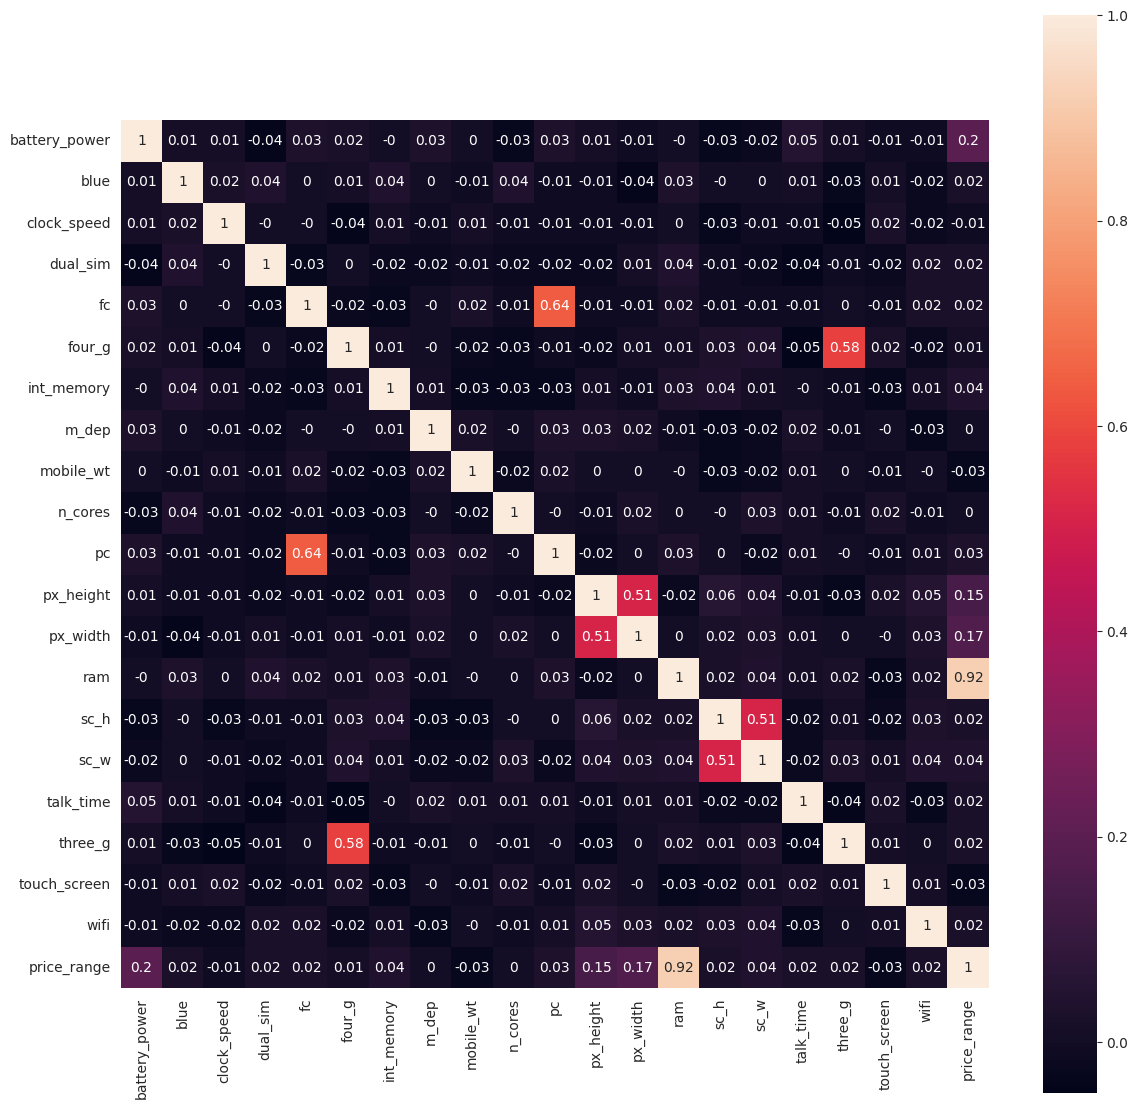

In [48]:
fig, ax = plt.subplots(1,1, figsize = (14, 14))
sns.heatmap(np.round(train_data.corr(), 2), annot=True, ax = ax, square=True)

**Assumptions from the Correlation Heatmap**

1. Most columns are barely related to each other

2. Height-typed and Width-typed columns usually have a high correlation score: **px_width** & **px_height**, **sc_h** & **sc_w**

3. Some pair of columns have some very strong correlation score such as **ram** & **price_range** (*92%*), **three_g** & **four_g** (*58%*), **pc** & **fc** (*64%*)

### Explore target column

In [49]:
# Value Counts
target_vc = train_data['price_range'].value_counts()
target_vc

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

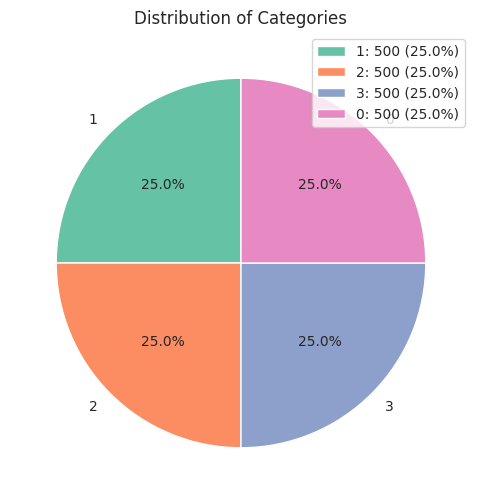

In [50]:
# Plotting pie chart
plt.figure(figsize=(8, 6))  # Set the figure size
patches, texts, autotexts = plt.pie(target_vc, labels=target_vc.index, autopct='%1.1f%%', startangle=90)
labels = [f'{target_vc.index[i]}: {target_vc[i]} ({autotexts[i].get_text()})' for i in range(len(target_vc))]
plt.legend(patches, labels, loc="best")
plt.title('Distribution of Categories')
plt.show()

The column **"price_range"** is divided into four equal slices, each comprising 500 records, representing 25% of the total.

These slices correspond to four classes in the target column: 0, 1, 2, and 3. I've inferred that class 0 encompasses entries with the lowest mobile prices, while class 3 comprises those with the highest possible prices.

### Relation between **price_range** and **battery_power**

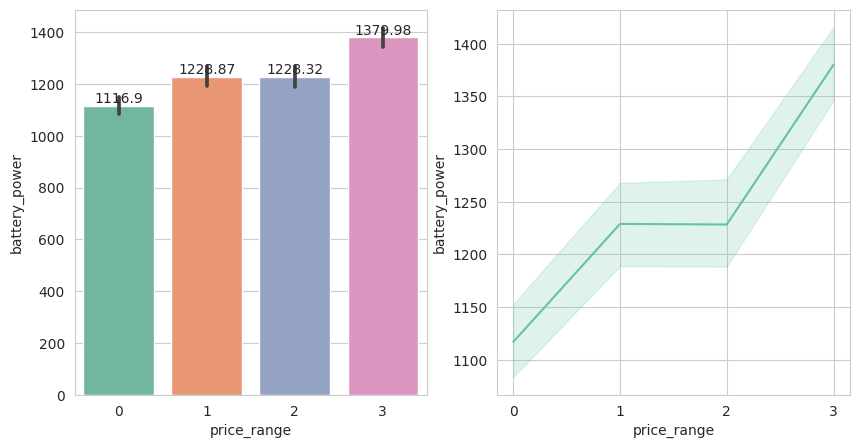

In [51]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])

Upon reviewing the two charts, a clear trend emerges: phones at higher price points typically boast greater and more robust battery life.

In the **price_range** class 0, there's a significant disparity in battery power when compared to class 3.

Classes 1 and 2 within the **price_range** exhibit nearly identical battery capacities.

### Relation between **price_range** and **clock_speed**

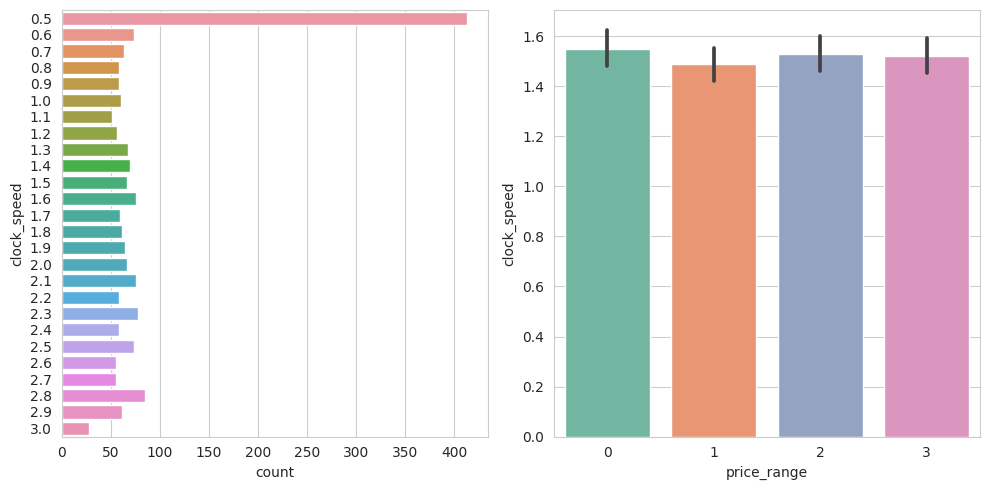

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(y = train_data['clock_speed'], ax = ax[0])

sns.barplot(x = train_data['price_range'], y = train_data['clock_speed'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
plt.tight_layout()

Despite variations in price, the majority of phones exhibit lower clock speeds, resulting in slower performance. Interestingly, the data suggests that price does not significantly influence the clock speed, as phones across different price ranges tend to maintain a similar performance level.

### Relation between **price_range** and **dual_sim**

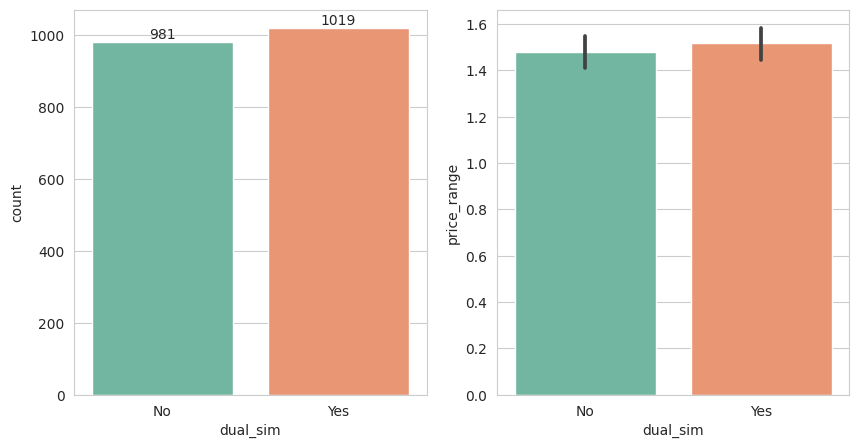

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['dual_sim'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticks([0,1], ['No', 'Yes'])

sns.barplot(x = train_data['dual_sim'], y = train_data['price_range'], ax = ax[1])
ax[1].set_xticks([0,1], ['No', 'Yes'])

Approximately half of the phones lack a dual SIM feature. Surprisingly, the data indicates that price does not significantly influence the presence of a dual SIM capability. However, there appears to be a slight price increase associated with phones equipped with this feature.

### Relation between **price_range** and camera types

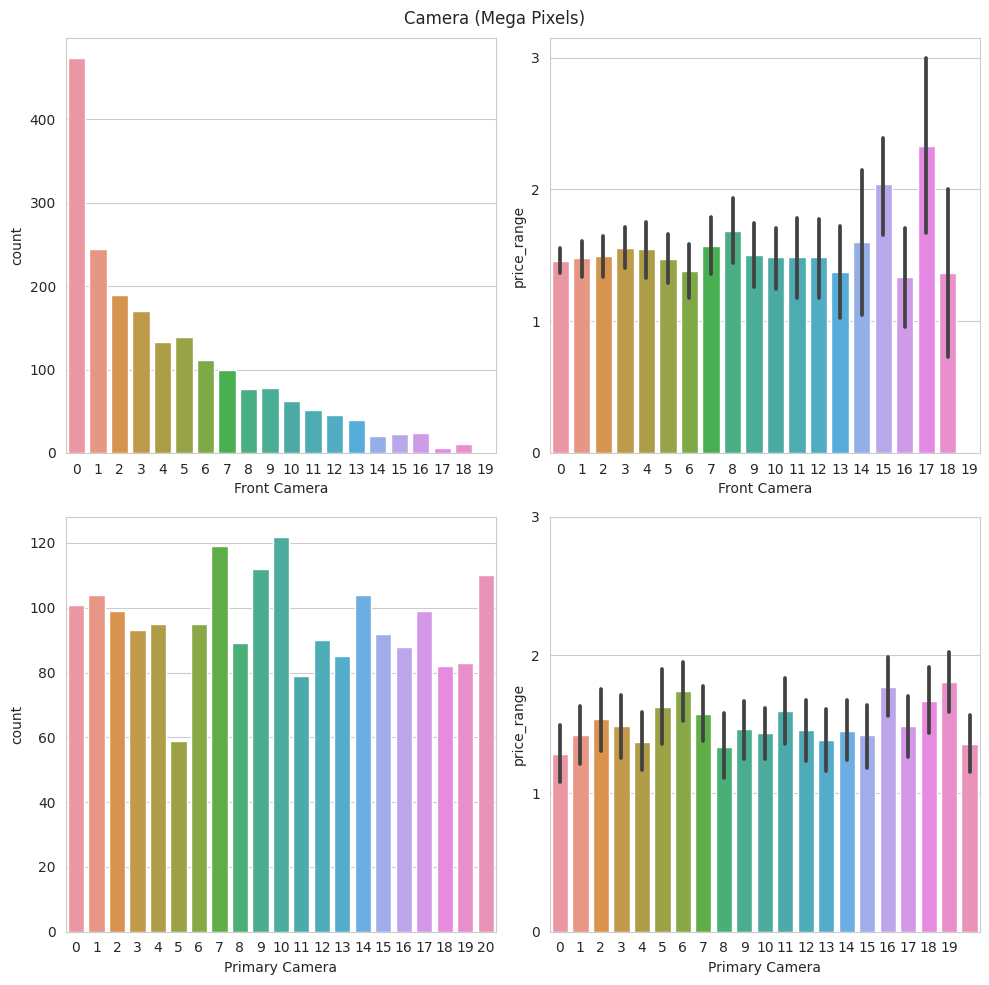

In [54]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['fc'], ax = ax[0][0])
ax[0][0].set_xlabel("Front Camera")

sns.barplot(x = train_data['fc'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xticks(np.arange(0, 20))
ax[0][1].set_yticks([0, 1, 2, 3])
ax[0][1].set_xlabel("Front Camera")

sns.countplot(x = train_data['pc'], ax = ax[1][0])
ax[1][0].set_xlabel("Primary Camera")

sns.barplot(x = train_data['pc'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xticks(np.arange(0, 20))
ax[1][1].set_yticks([0, 1, 2, 3])
ax[1][1].set_xlabel("Primary Camera")

fig.suptitle("Camera (Mega Pixels)")
plt.tight_layout()

1. Over 400 mobiles lack a front camera, and there's a scarcity of devices with high-resolution front cameras.
2. Approximately 100 mobiles lack a primary camera, while the highest pixel count for primary cameras caps at 20.
3. Remarkably, the data suggests that price ranges remain unaffected by variations in camera pixel counts, indicating no discernible correlation between price and camera resolution.

### Relation between **price_range** and 3G/4G phone

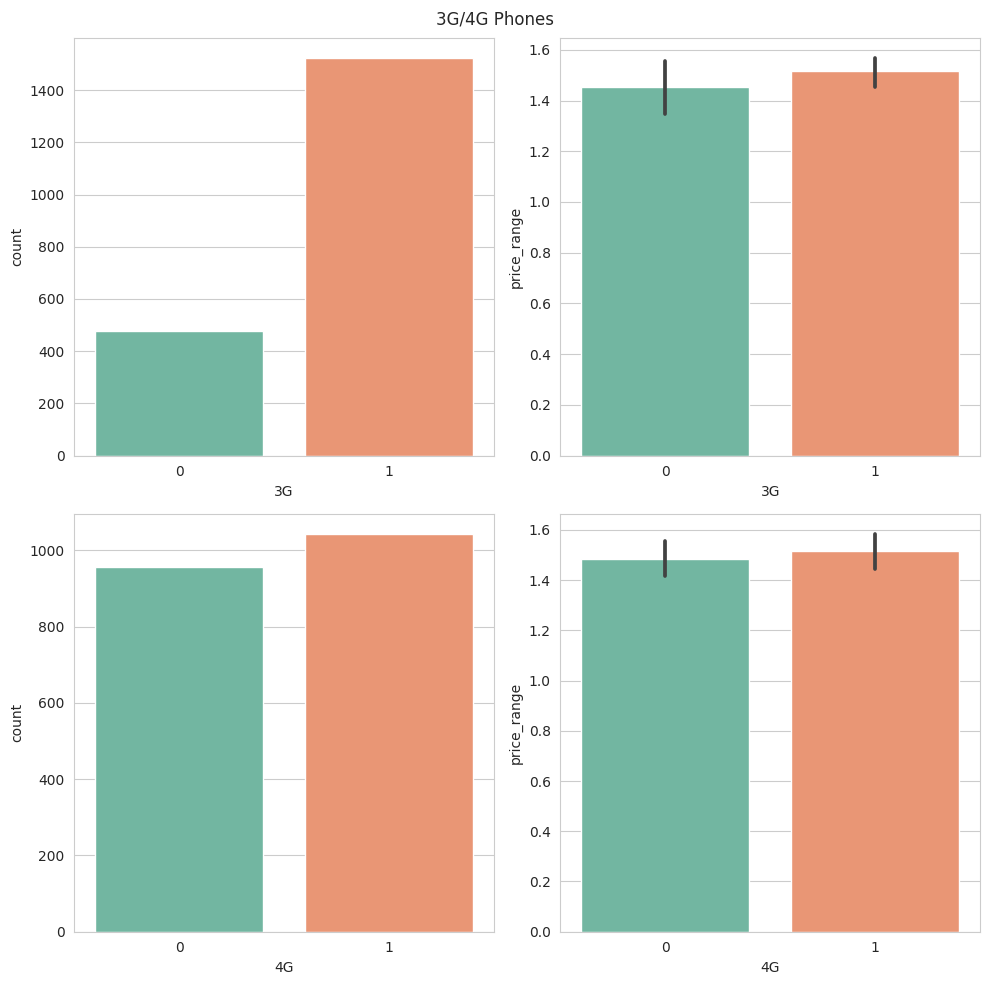

In [55]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['three_g'], ax = ax[0][0])
ax[0][0].set_xlabel("3G")

sns.barplot(x = train_data['three_g'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xlabel("3G")

sns.countplot(x = train_data['four_g'], ax = ax[1][0])
ax[1][0].set_xlabel("4G")

sns.barplot(x = train_data['four_g'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xlabel("4G")

fig.suptitle("3G/4G Phones")
plt.tight_layout()

1. Over half of the phones feature 3G capability, correlating with a slightly higher price compared to those without this feature.
2. Conversely, around half of the phones lack 4G capability, mirroring the pattern observed with 3G, with a marginal price difference between devices with and without this feature.

### Phone Internal Memory Distribution

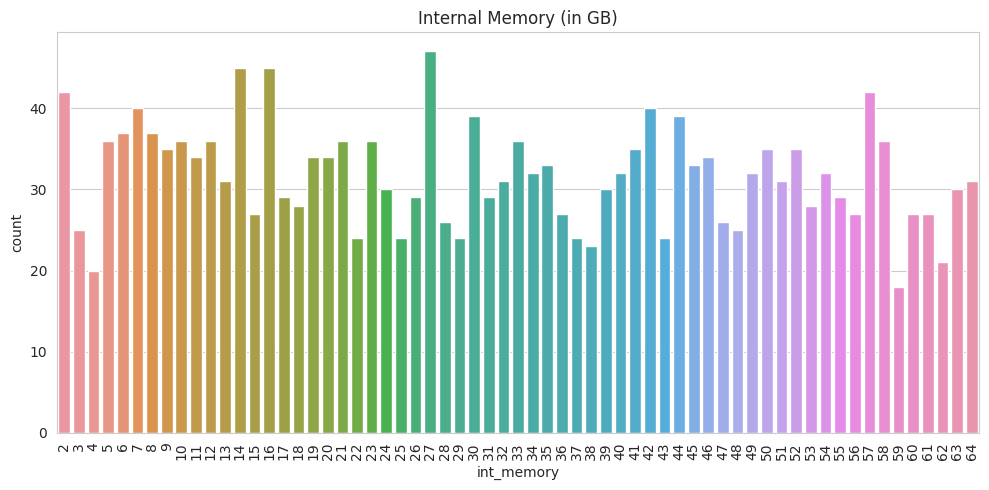

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x = train_data['int_memory'])
plt.xticks(rotation = 90)
plt.title("Internal Memory (in GB)")
plt.tight_layout()

1. More than 120 phones possess internal memory capacities of **27GB, 14GB, and 16GB**.
2. Approximately 100 phones are limited to less than **5GB** of internal memory.
3. Notably, over 30 phones boast the highest internal memory capacity available, set at **64GB.**

### Phone Depth Distribution

Text(0.5, 1.0, 'Mobile Depth (in cm)')

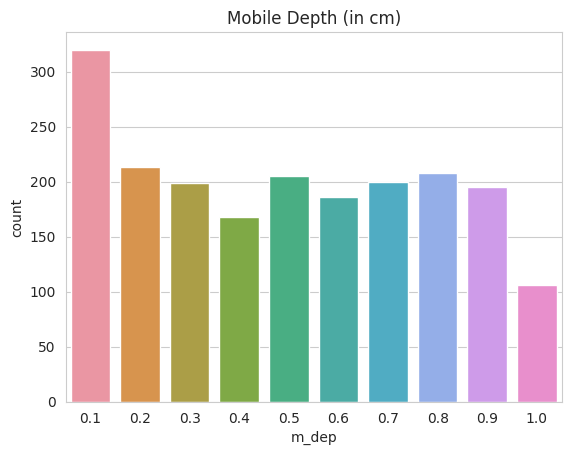

In [57]:
sns.countplot(x = train_data['m_dep'])
plt.title("Mobile Depth (in cm)")

1. Over 300 mobiles showcase a depth measurement of 1mm.
2. More than 100 mobiles exhibit a depth of 10mm.
3. A significant count of 400+ mobiles falls within the depth range of 2mm to 9mm.

### Phone Weight Distribution

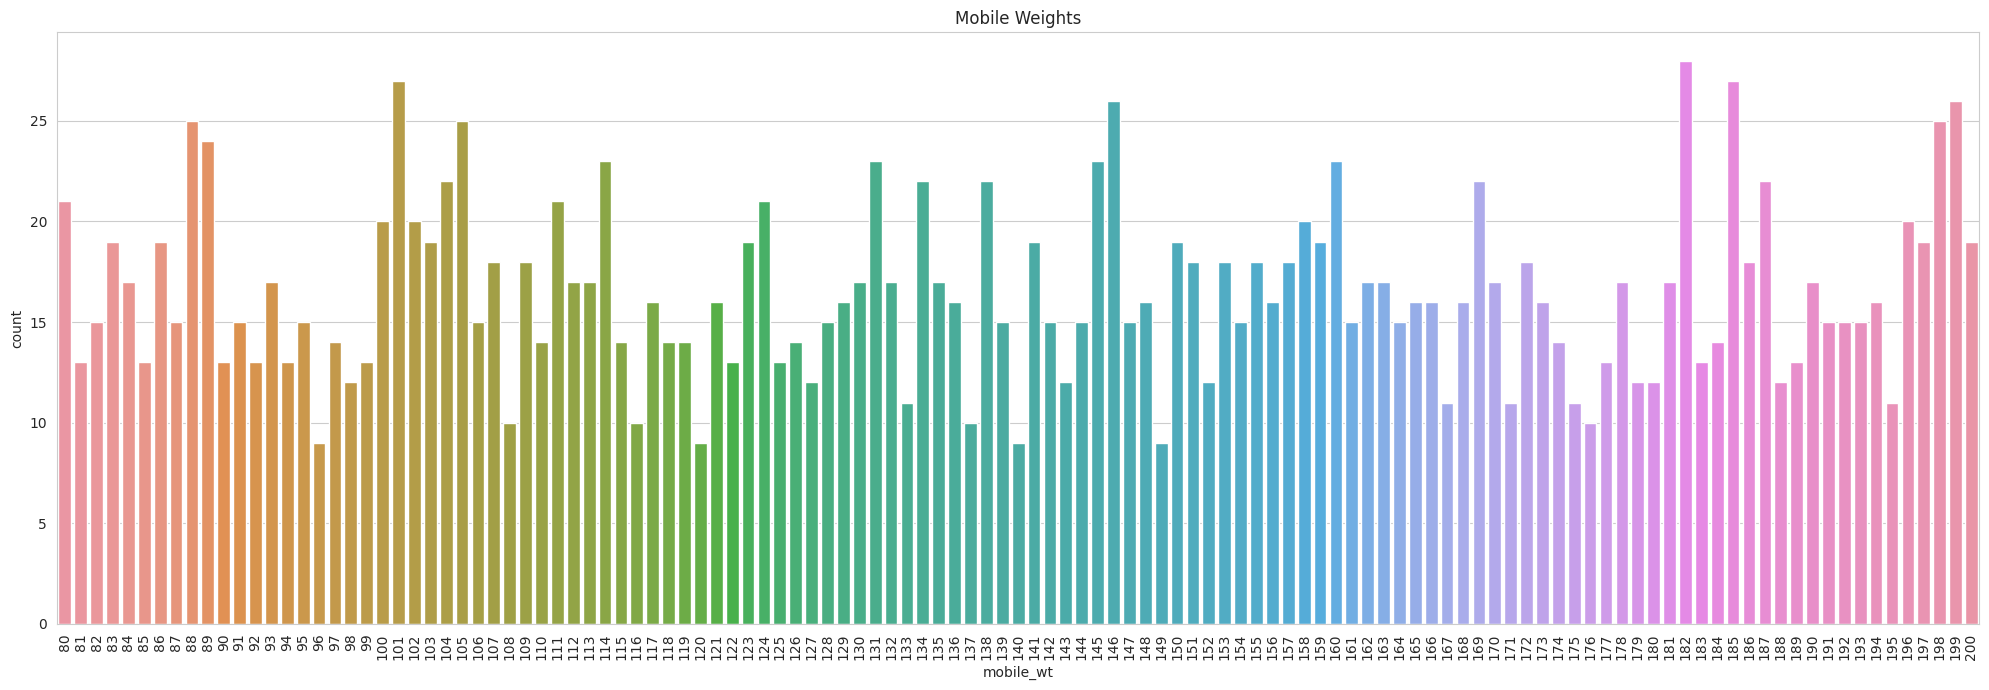

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(x = train_data['mobile_wt'])
plt.xticks(rotation = 90)
plt.title("Mobile Weights")
plt.tight_layout()

1. Mobile weights are between 80g-200g
2. Average weight of mobile phones is 140g

### Relation between **price_range** and pixel height/width

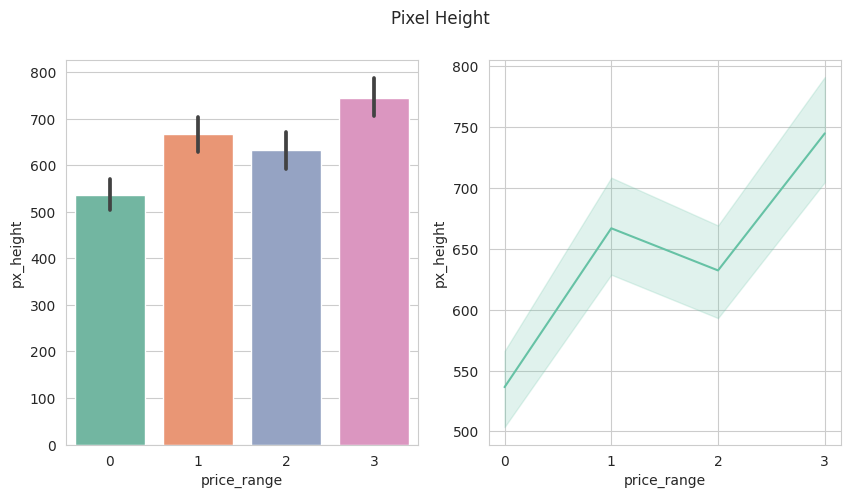

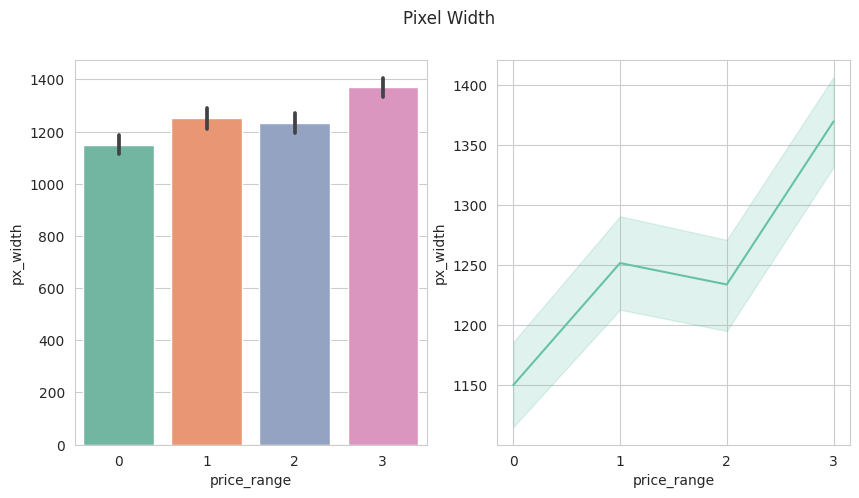

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Pixel Height")
sns.barplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[0])
sns.lineplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Pixel Width")
sns.barplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[0])
sns.lineplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])

1. As pixel height and width increase, there's a corresponding upward trend in prices.
2. Notably, within the price ranges of 1 and 2, the devices in range 2 tend to exhibit lower pixel width and height compared to those in range 1

### Relation between **price_range** and **ram**

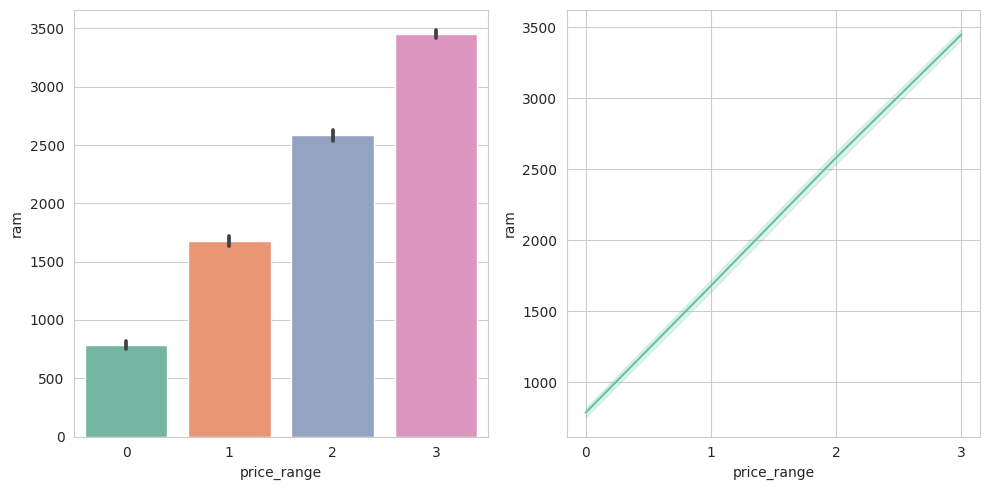

In [60]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[0])
sns.lineplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])
plt.tight_layout()

1. Higher RAM capacities align with increased pricing in the dataset.
2. The dataset predominantly showcases a maximum RAM size of 4GB or slightly below, indicating a limitation in larger RAM capacities among the listed devices.

### Relation between **price_range** and screen **Touch Screen Facility**

Text(0.5, 0.98, 'Touch Screen facility')

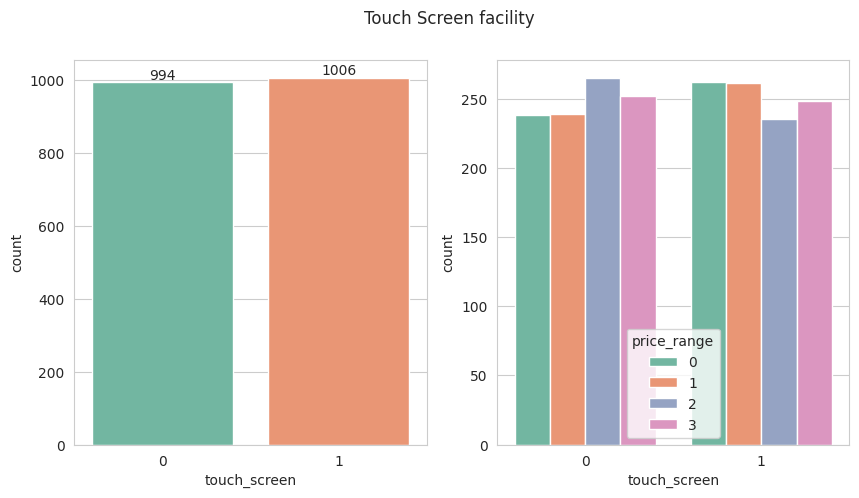

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['touch_screen'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
sns.countplot(x = train_data['touch_screen'], hue = train_data['price_range'])
fig.suptitle("Touch Screen facility")

1. A significant majority of phones lack touch screen functionality.
2. Interestingly, among phones devoid of touch screen capabilities, a notable concentration exists within the price ranges of 2-3
3. Conversely, phones equipped with touch screen functionality are less prevalent within the price ranges of 2-3

### Relation between **price_range** and **Wifi Facility**

Text(0.5, 0.98, 'WIFI facility')

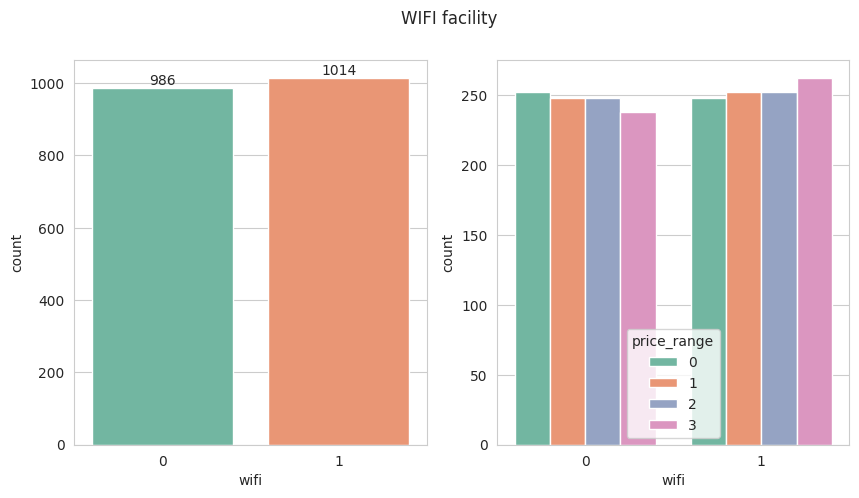

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['wifi'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
sns.countplot(x = train_data['wifi'], hue = train_data['price_range'])
fig.suptitle("WIFI facility")

1. Over half of the phones in the dataset lack Wi-Fi functionality.
2. Among phones without Wi-Fi, there's consistency in price ranges.
3. However, devices equipped with Wi-Fi exhibit a slight increase in price ranges, indicating a potential pricing influence linked to this feature.

### Hisplots for each column

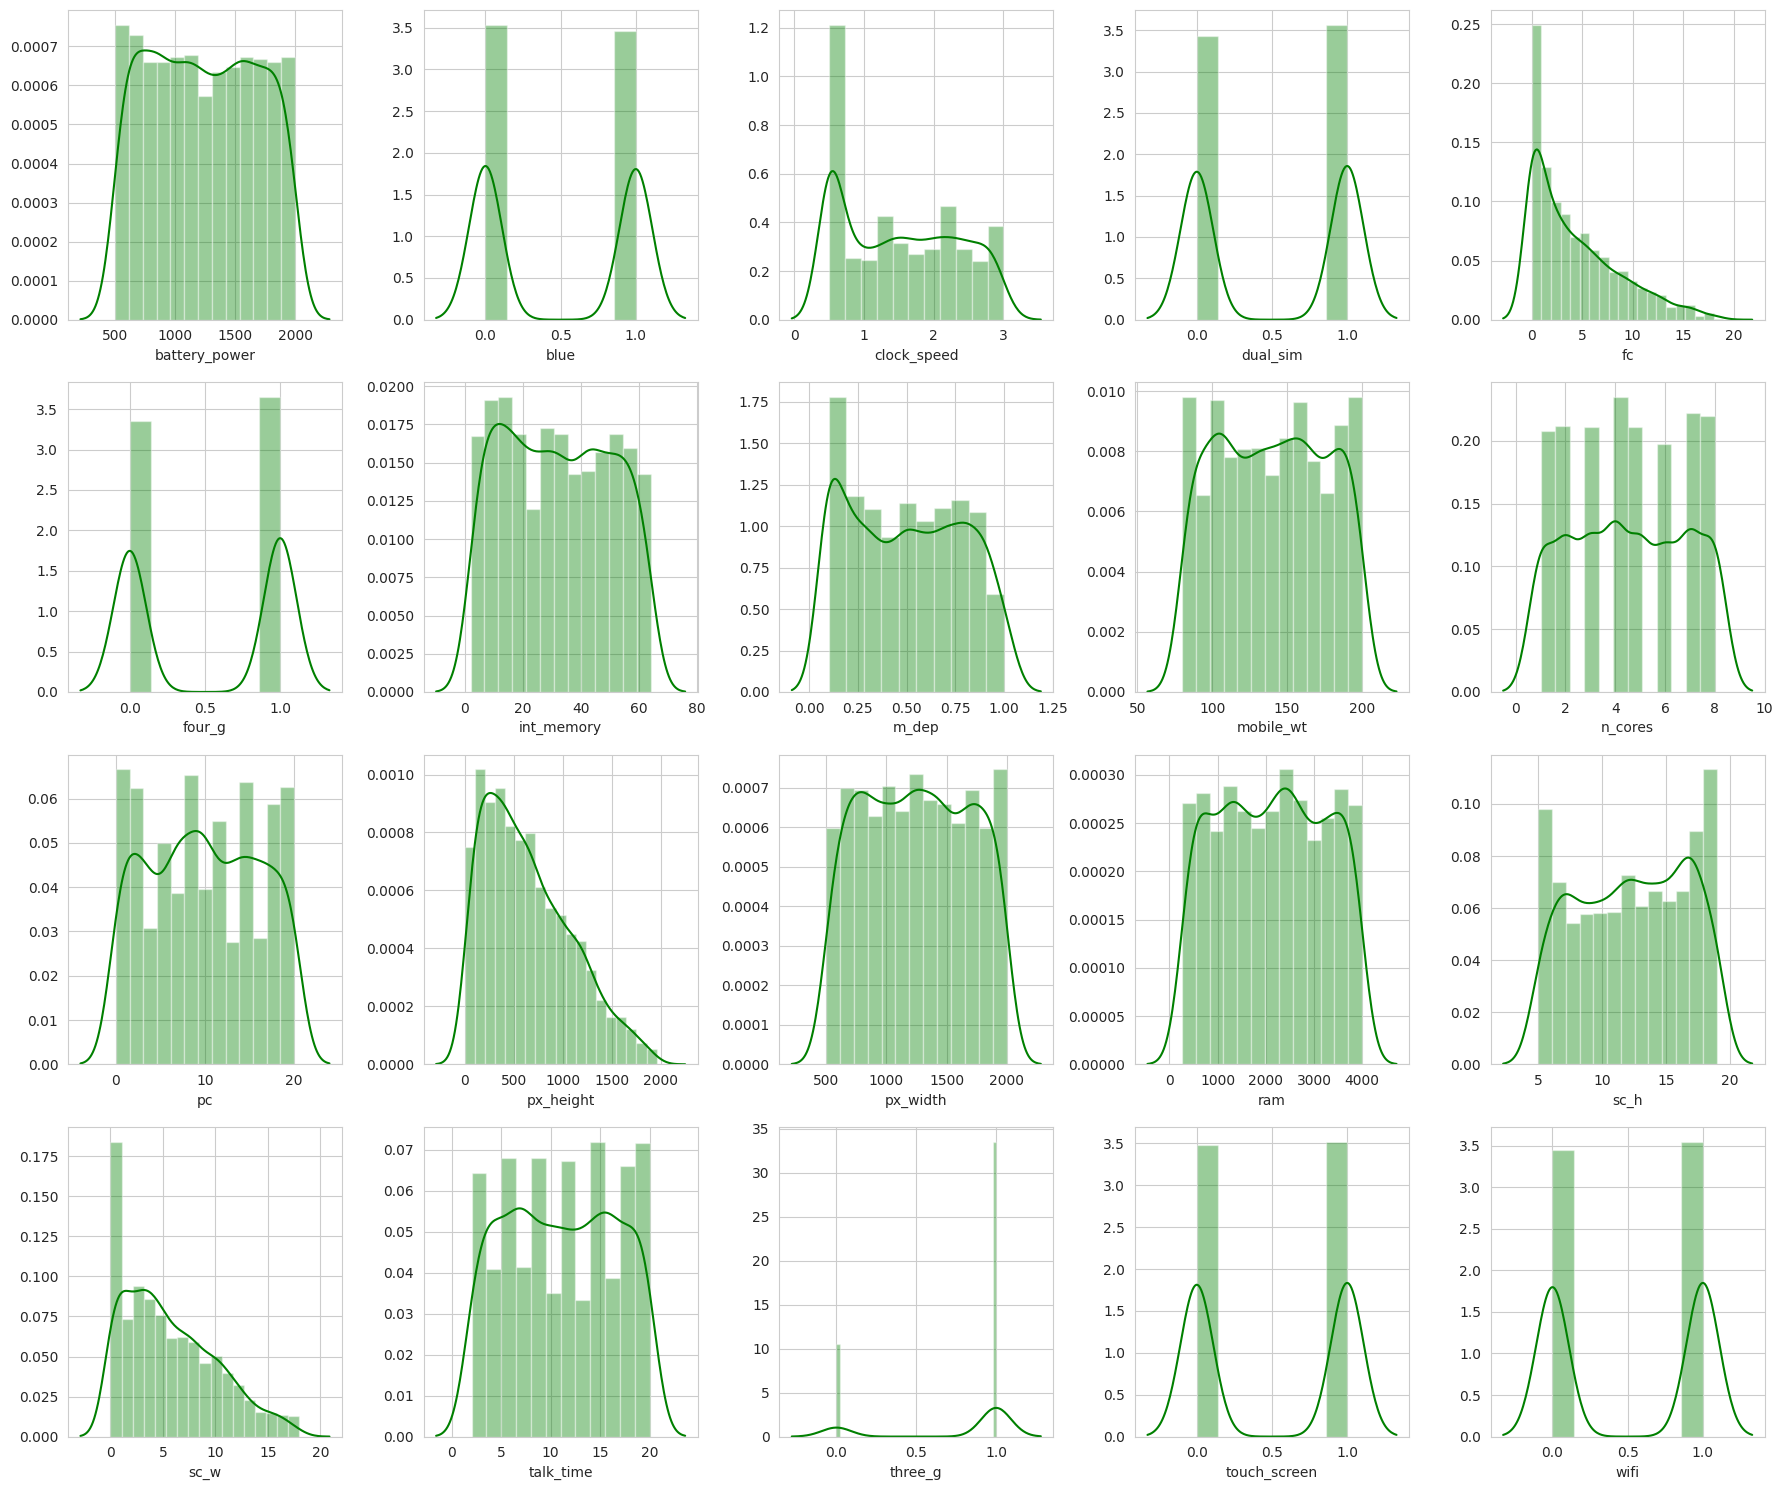

In [63]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.distplot(train_data[train_data.columns[count]], ax = ax[i][j], color='green')
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

1. The majority of data distributions appear **skewed** or **discrete**, prompting their exclusion from analysis.
2. Certain distributions, such as (**fc, sc_w**), exhibit a summation pattern resembling a log-normal distribution. Despite this, the dataset's tree-like structure dissuades converting them into Gaussian distributions for analysis.

### Boxplots for each column

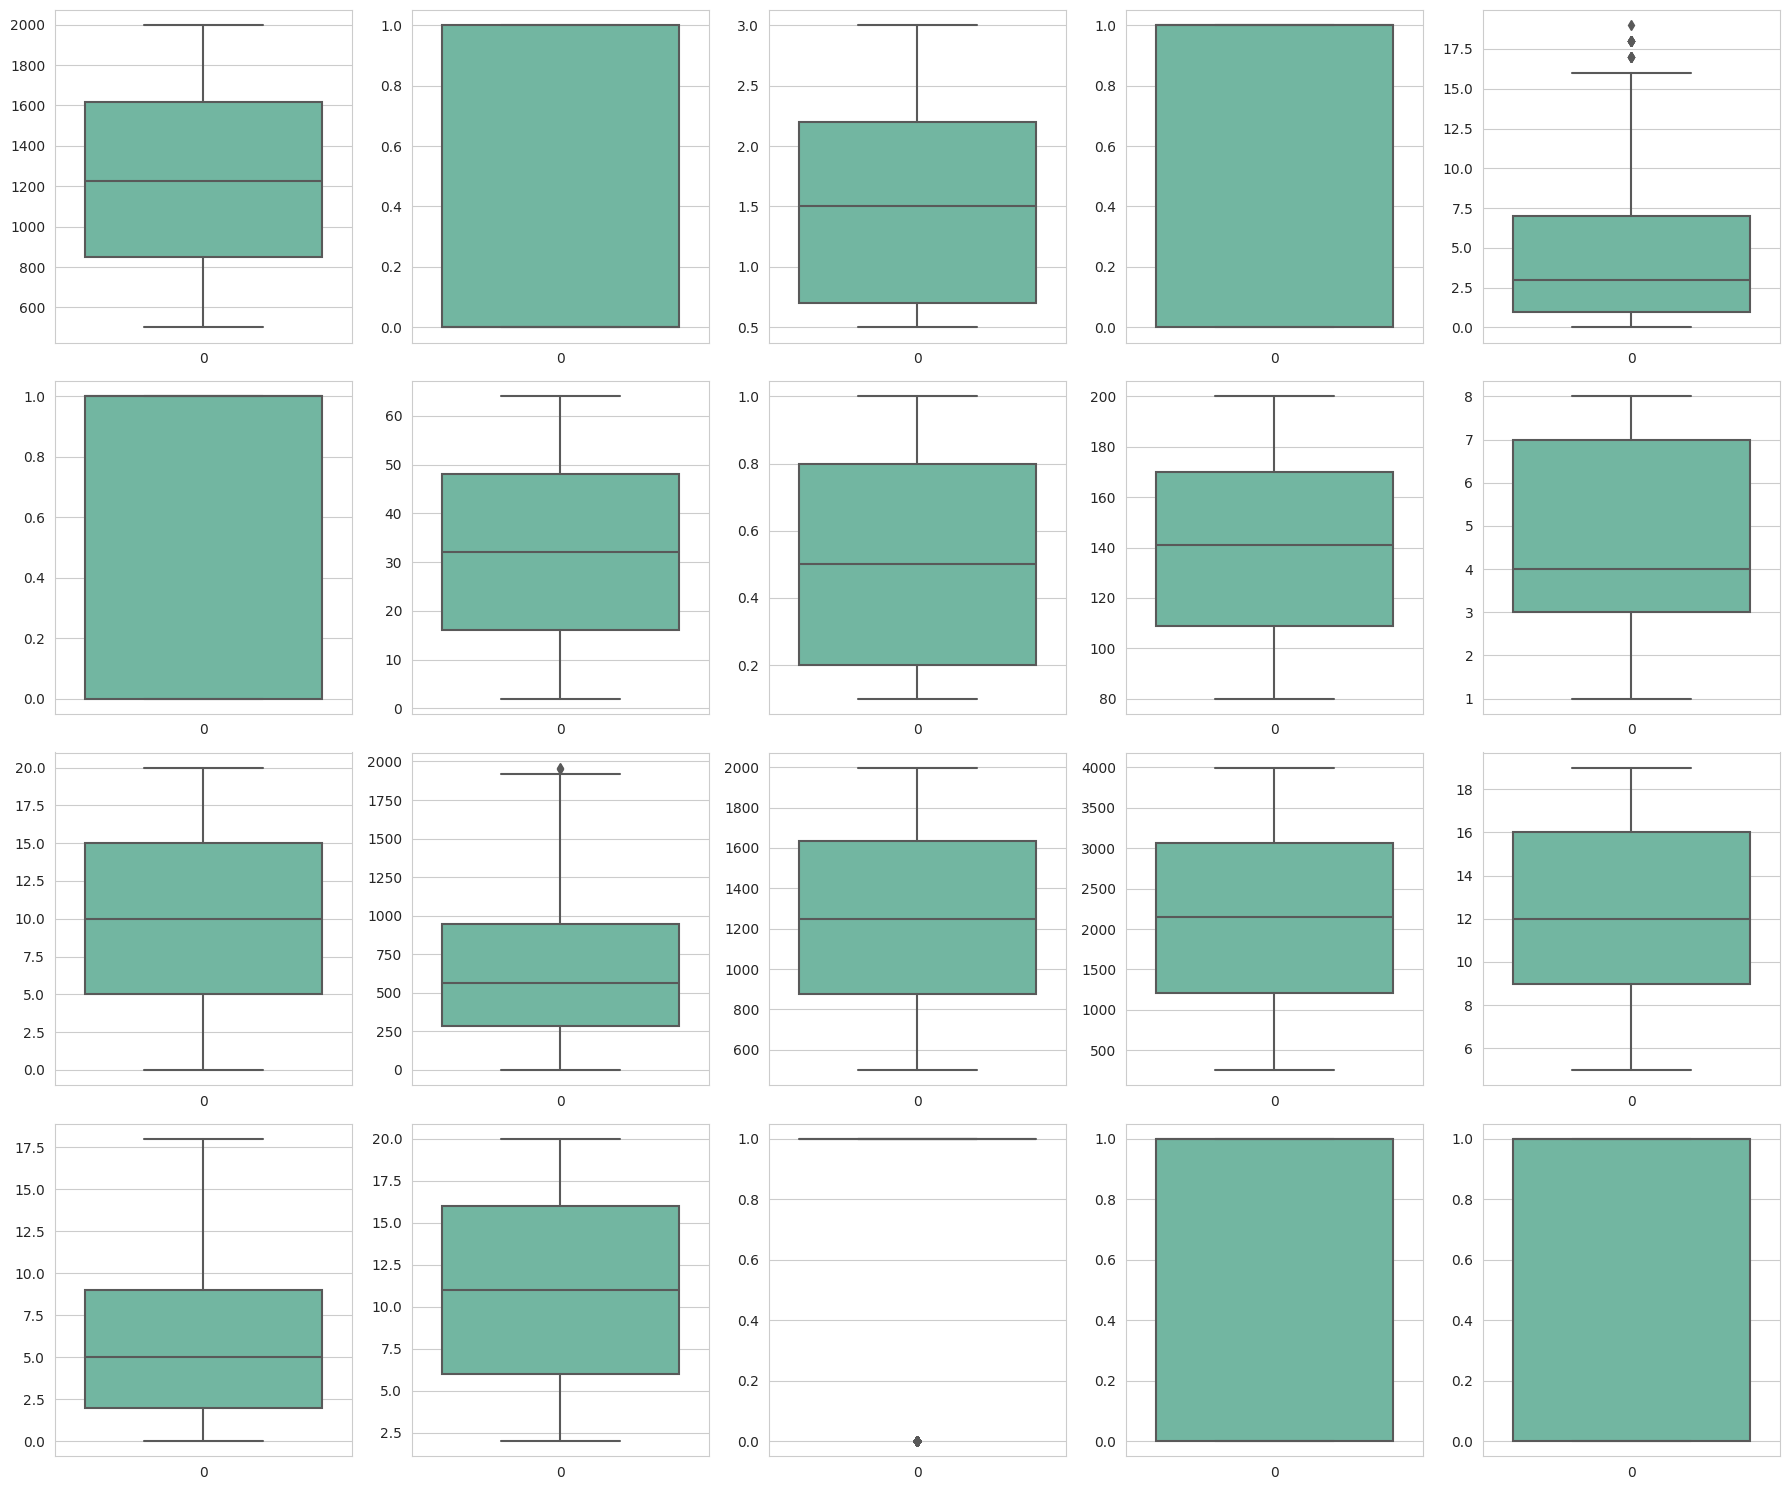

In [64]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.boxplot(train_data[train_data.columns[count]], ax = ax[i][j])
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

1. The majority of data points do not exhibit outliers.
2. However, specific attributes like (**px_height, fc**) seem to contain outliers. Despite their presence, these outliers are retained to prevent potential overfitting of the data.

## **Feature Scaling**

### Using MinMaxScaler for scaling

In [67]:
# Applying minmaxscaler on columns with more than 10 discrete values
minmaxscaler = MinMaxScaler()

columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

train_data[columns] = minmaxscaler.fit_transform(train_data[columns])

# Same for testing columns
test_data[columns] = minmaxscaler.transform(test_data[columns])

### Split Train/Test set

In [68]:
X, y = train_data.drop(columns=['price_range']), train_data['price_range']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)

In [69]:
print(f'X_train: - {x_train.shape}\nX_test: - {x_val.shape}')

X_train: - (1400, 20)
X_test: - (600, 20)


## **Machine Learning Model Development**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score

In [71]:
# Creating Function for measuring metrics of every model

res = {'Model':[], 'Accuracy':[], 'CV Score':[]}

def metrics(train_predicts, test_predicts, model, ensemble = False, name = ''):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(accuracy_score(train_predicts, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(accuracy_score(test_predicts, y_val), 2)*100}%')

    print(f'\n**********Classification Report**********\n\n')
    print(classification_report(y_val, test_predicts))

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'**********Cross Validation**********\n\n')

    print(pd.Series(cv_scores))
    print(f'\n\nMean Score: - {np.mean(cv_scores)}\n')

    matrix = confusion_matrix(test_predicts, y_val)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax = ax[0])


    if ensemble == True:
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])

    res['Model'].append(name)
    res['Accuracy'].append(np.round(accuracy_score(test_predicts, y_val), 2)*100)
    res['CV Score'].append(np.round(np.mean(cv_scores), 2))

    plt.tight_layout()

### Logistic Regression

In [74]:
# Hyperparameter tunning for Logistic Regression
param_grid = {
    'C': [0.1, 1.0, 10.0, 100],  # Regularization parameter
    'penalty': ['l1', 'l2',None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

scoring = 'accuracy'

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [75]:
grid_search_logistic.best_estimator_

LogisticRegression(C=10.0, max_iter=400, penalty='l1', solver='saga')

**************************************************
Train Accuracy: - 98.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.96       146
           2       0.97      0.93      0.95       148
           3       0.97      0.98      0.97       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

**********Cross Validation**********


0    0.9700
1    0.9625
2    0.9750
3    0.9750
4    0.9750
dtype: float64


Mean Score: - 0.9715



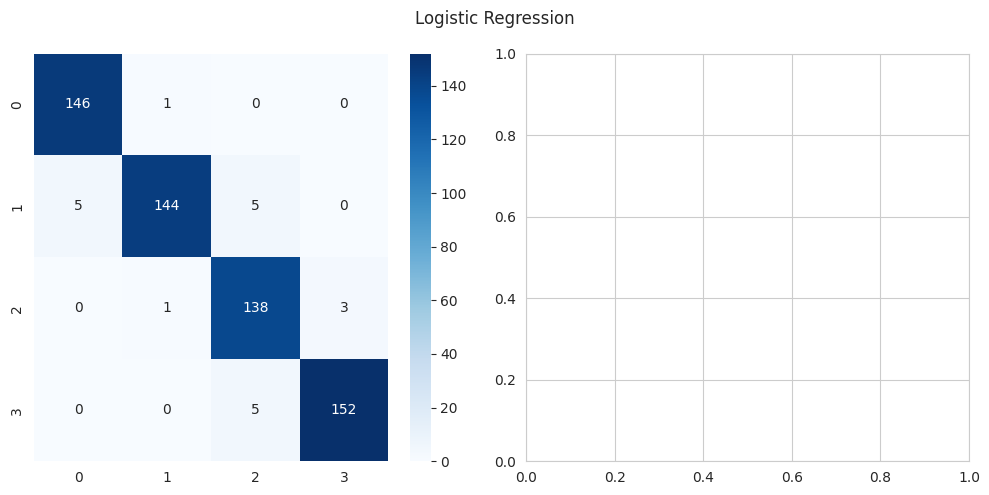

In [76]:
model_logistic = grid_search_logistic.best_estimator_
metrics(model_logistic.predict(x_train), model_logistic.predict(x_val),model=model_logistic, name='Logistic Regression')

### Decision Tree

In [77]:
max_depth = [5, 10, 50, 100, 150, 200,500, 1000]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt_para, cv=5, scoring='accuracy', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [5, 10, 50, 100, 150, 200, 500, 1000],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='accuracy')

In [78]:
grid_df_CV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       min_samples_split=5)

**************************************************
Train Accuracy: - 95.0%
Test Accuracy: - 85.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       151
           1       0.77      0.86      0.82       146
           2       0.80      0.78      0.79       148
           3       0.90      0.88      0.89       155

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

**********Cross Validation**********


0    0.8600
1    0.8450
2    0.8525
3    0.8275
4    0.8575
dtype: float64


Mean Score: - 0.8485000000000001



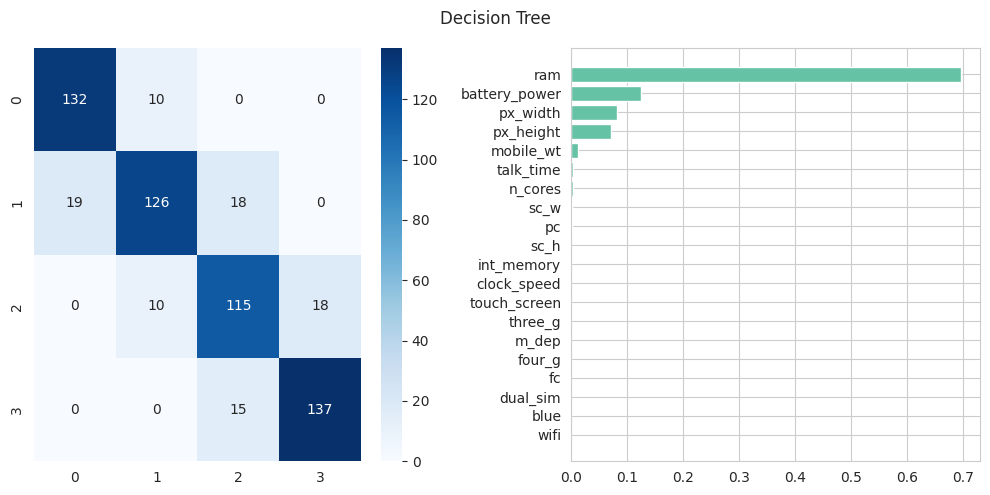

In [79]:
model_dt = grid_df_CV.best_estimator_

metrics(model_dt.predict(x_train), model_dt.predict(x_val), model_dt, ensemble=True, name = 'Decision Tree')

### Random Forest

In [80]:
n_estimators = [5, 10, 50,100]
max_depth = [10, 25, 50, 100, 120,500]
min_samples_split = [2,5,10, 15]
min_samples_leaf = [1,2,4,6]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf,
                'n_estimators':n_estimators}

grid_rf_CV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf_para, cv=5, n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [10, 25, 50, 100, 120, 500],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 50, 100]})

In [81]:
grid_rf_CV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=500)

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 89.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.82      0.89      0.85       146
           2       0.84      0.80      0.82       148
           3       0.94      0.92      0.93       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

**********Cross Validation**********


0    0.8800
1    0.8850
2    0.8950
3    0.8600
4    0.8775
dtype: float64


Mean Score: - 0.8795



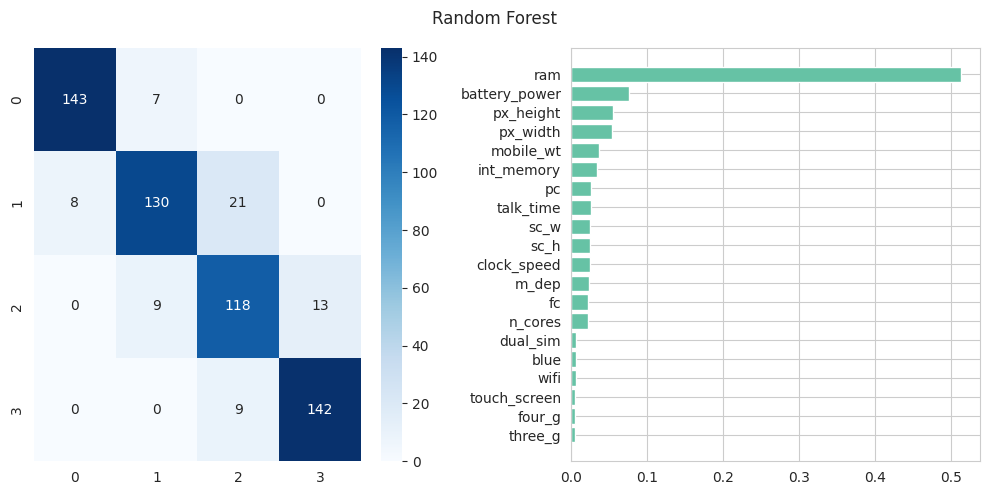

In [82]:
model_rf = grid_rf_CV.best_estimator_

metrics(model_rf.predict(x_train), model_rf.predict(x_val), model= model_rf, name='Random Forest', ensemble=True)

### XGBoost

In [83]:
xgb_model = XGBClassifier(objective='binary:logistic')

param_grid_xgb = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

grid_xg_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_xg_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 91.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       151
           1       0.87      0.92      0.90       146
           2       0.88      0.86      0.87       148
           3       0.95      0.92      0.93       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

**********Cross Validation**********


0    0.9100
1    0.9300
2    0.9200
3    0.9075
4    0.8975
dtype: float64


Mean Score: - 0.913



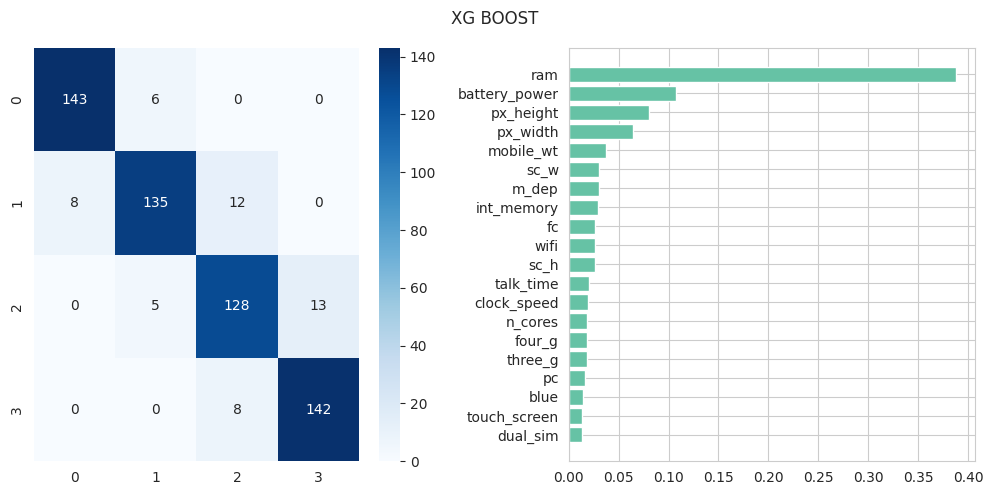

In [84]:
model_xgb = grid_xg_cv.best_estimator_
metrics(model_xgb.predict(x_train), model_xgb.predict(x_val), model = model_xgb, name='XG BOOST', ensemble=True)

### SVC (Support Vector Machine)

In [85]:
param_grid_svm = {'C':[1, 10, 25, 50, 100],
                  'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}

grid_svm_CV = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, n_jobs=-1, scoring='accuracy', cv=5)
grid_svm_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 25, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**************************************************
Train Accuracy: - 98.0%
Test Accuracy: - 96.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       151
           1       0.91      0.99      0.95       146
           2       0.98      0.91      0.94       148
           3       0.97      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

**********Cross Validation**********


0    0.9725
1    0.9600
2    0.9700
3    0.9675
4    0.9650
dtype: float64


Mean Score: - 0.967



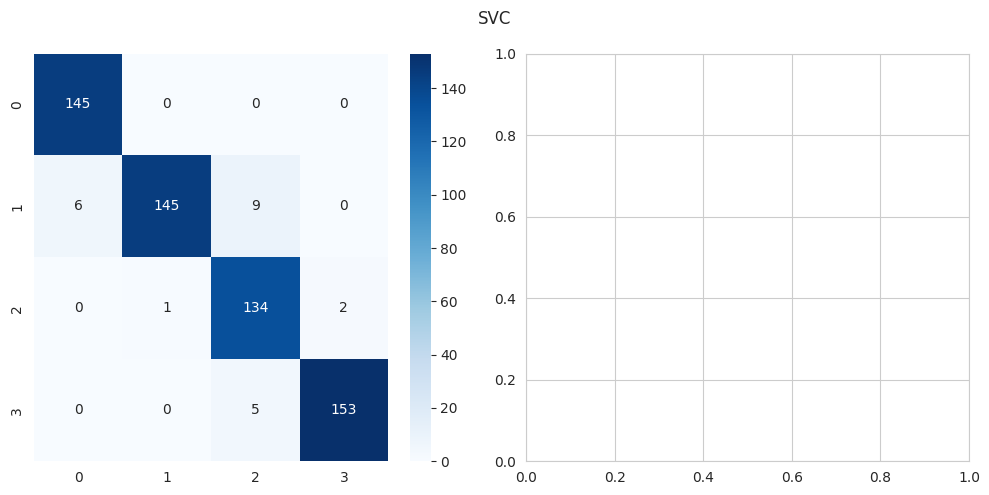

In [86]:
model_svc = grid_svm_CV.best_estimator_

metrics(model_svc.predict(x_train), model_svc.predict(x_val), model = model_svc, name = 'SVC')

### Gaussian Naive Bayes

**************************************************
Train Accuracy: - 82.0%
Test Accuracy: - 80.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.74      0.73      0.74       146
           2       0.67      0.72      0.70       148
           3       0.88      0.83      0.86       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

**********Cross Validation**********


0    0.8050
1    0.8200
2    0.8300
3    0.8075
4    0.7825
dtype: float64


Mean Score: - 0.8089999999999999



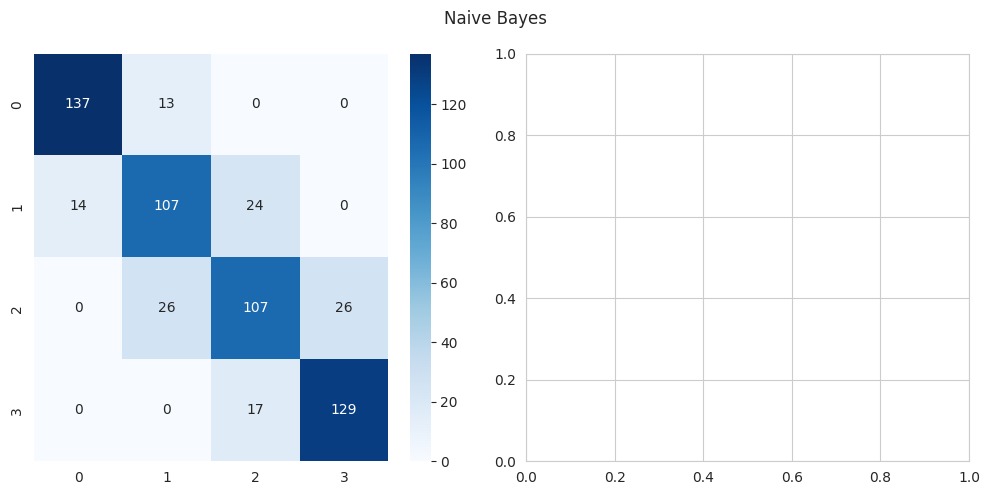

In [87]:
model_nb = GaussianNB().fit(x_train, y_train)

metrics(model_nb.predict(x_train), model_nb.predict(x_val), model=model_nb, name = 'Naive Bayes')

### **Model Evaluation**

In [88]:
compare_model = pd.DataFrame(res)
compare_model.set_index('Model', inplace=True)
compare_model

,Accuracy,CV Score
Model,,
Logistic Regression,97.0,0.97
Decision Tree,85.0,0.85
Random Forest,89.0,0.88
XG BOOST,91.0,0.91
SVC,96.0,0.97
Naive Bayes,80.0,0.81


 The **Logistic Regression** and **SVC** models exhibit the highest accuracy, achieving approximately 97% in both accuracy and cross-validation scores.

## **Apply the models for Test Set**

In [89]:
# Train models
model_logistic.fit(X, y)
model_dt.fit(X, y)
model_rf.fit(X, y)
model_xgb.fit(X, y)
model_svc.fit(X, y)
model_nb.fit(X, y)

GaussianNB()

In [90]:
# Drop ID column
id = test_data['id']
test_data.drop(columns=['id'], inplace=True)

### Create the final dataframe to store the predicted values

In [91]:
final = pd.DataFrame({'ID':id,
                      'Price_Range_Logistic':model_logistic.predict(test_data),
                      'Price_Range_DT':model_dt.predict(test_data),
                      'Price_Range_RF':model_rf.predict(test_data),
                      'Price_Range_SVC':model_svc.predict(test_data),
                      'Price_Range_NVB':model_nb.predict(test_data),
                      'Price_Range_XGB':model_xgb.predict(test_data)})
final.set_index('ID', inplace=True)

In [92]:
final.head()

,Price_Range_Logistic,Price_Range_DT,Price_Range_RF,Price_Range_SVC,Price_Range_NVB,Price_Range_XGB
ID,,,,,,
1,3,3,3,3,3,3
2,3,3,3,3,3,3
3,2,3,3,2,2,2
4,3,3,3,3,3,3
5,1,1,1,1,1,1
